# Описание проекта

## Задача

Приоритизация по фреймворкам ICE и RICE гипотез для увеличения выручки интернет-магазина и анализ A/B-теста.

## Ход исследования

1. Приоритизация гипотез
2. Анализ A/B-теста
3. Вывод

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import datetime as dt
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

# 1. Приоритизация гипотез

In [2]:
# Загружаем данные
hypothesis = pd.read_csv('hypothesis.csv')
    
# Приведём к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()

In [3]:
# Взглянем на таблицу, увеличив размеры столбцов
pd.options.display.max_colwidth = 150
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
# Применим фреймворк ICE для приоритизации гипотез, отсортируем их по убыванию приоритета и округлим до второго знака после точки
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'])
hypothesis['ice'] = hypothesis['ice'].round(2)

print(hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False))

                                                                                                     hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользоват

In [5]:
# И фреймворк RICE
hypothesis['rice'] = (
    hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
)

print(hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False))

                                                                                                     hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

## Как изменилась приоритизация гипотез при применении RICE вместо ICE
Наиболее перспективные гипотезы по ICE под индексами 8, 0, 7, 6. По фреймворку RICE — под индексами 7, 2, 0, 6. Изменение первого места обусловлено высоким показателем Reach у седьмой гипотезы — 10. У восьмой гипотезы охват равен единице.

In [6]:
print('Наиболее перспективные гипотезы по ICE')
print()
print(hypothesis['hypothesis'][[8, 0, 7, 6]])
print()
print('Наиболее перспективные гипотезы по RICE')
print()
print(hypothesis['hypothesis'][[7, 2, 0, 6]])

Наиболее перспективные гипотезы по ICE

8                                                 Запустить акцию, дающую скидку на товар в день рождения
0      Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
7        Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
6    Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
Name: hypothesis, dtype: object

Наиболее перспективные гипотезы по RICE

7                Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
2    Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
0              Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
6            Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
Name: 

# 2. Анализ A/B-теста

In [7]:
# Загружаем файлы
# orders
orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')
    
print(orders.head())
print()
print(visitors.head())

   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B

         date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507
3  2019-08-04     A       717
4  2019-08-05     A       756


In [8]:
# Зададим змеиный регистр и заменим пробелы в названиях столбцов
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})
print(orders.columns)

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')


In [9]:
print(orders.info())
print()
print(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


In [10]:
# Приведём к datetime
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [11]:
# Проверим пропуски
for name, df in ('orders', orders), ('visitors', visitors):
    print(f'Датафрейм {name}')
    print(df.isna().sum())
    print()

Датафрейм orders
transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

Датафрейм visitors
date        0
group       0
visitors    0
dtype: int64



In [12]:
# Наличие явных дубликатов
for name, df in ('orders', orders), ('visitors', visitors):
    print(f'Количество явных дубликатов в {name}: {df.duplicated().sum()}')
    print()

Количество явных дубликатов в orders: 0

Количество явных дубликатов в visitors: 0



In [13]:
# Проверим наличие неявных дубликатов в интересующих нас местах
print(f"visitors['group']\n{visitors['group'].unique()}")
print()
print(f"orders['group']\n{orders['group'].unique()}")

visitors['group']
['A' 'B']

orders['group']
['B' 'A']


In [14]:
# Создаем множество уникальных посетителей для группы A
visitors_group_a = set(orders.loc[orders['group'] == 'A']['visitor_id'])

# Создаем множество уникальных посетителей для группы B
visitors_group_b = set(orders.loc[orders['group'] == 'B']['visitor_id'])

# Возвращаем id посетителей, если они присутствуют одновременно в обоих множествах
intersection_visitors = visitors_group_a & visitors_group_b

# Проверяем, есть ли пересечение посетителей
if len(intersection_visitors) == 0:
    print('Нет посетителей, попадающих в обе группы.')
else:
    print('Посетители, попадающие в обе группы:', intersection_visitors)

Посетители, попадающие в обе группы: {3957174400, 3984495233, 2780786433, 1294878855, 1648269707, 1614305549, 4120364173, 232979603, 199603092, 4266935830, 2712142231, 2587333274, 2716752286, 3891541246, 1668030113, 2654030115, 3234906277, 1230306981, 1404934699, 3803269165, 2949041841, 237748145, 457167155, 2927087541, 1738359350, 3062433592, 3656415546, 818047933, 393266494, 963407295, 471551937, 2579882178, 3202540741, 2686716486, 1333886533, 2044997962, 3941795274, 1801183820, 2378935119, 4256040402, 4069496402, 3766097110, 8300375, 351125977, 1602967004, 276558944, 2038680547, 3951559397, 3963646447, 4186807279, 3717692402, 1959144690, 2458001652, 2600415354, 2954449915, 1316129916, 477780734, 3972127743}


In [15]:
print(len(intersection_visitors))
print()
print(orders.loc[(orders['group'] == 'A') & (orders['visitor_id'] == 2780786433)])
print()
print(orders.loc[(orders['group'] == 'B') & (orders['visitor_id'] == 2780786433)])

58

     transaction_id  visitor_id       date  revenue group
304       609915801  2780786433 2019-08-28     1200     A
548       430186476  2780786433 2019-08-29     1580     A

     transaction_id  visitor_id       date  revenue group
857       847315305  2780786433 2019-08-27      540     B


Как мы видим, несколько посетителей, совершивших покупки, попали в обе группы. Учитывая, что их 58, удалим их из таблицы orders.

In [16]:
# Посмотрим на датасет до изменений
print(len(orders))
print()
print(orders.head(10))
print()
print(orders.tail(10))

1197

   transaction_id  visitor_id       date  revenue group
0      3667963787  3312258926 2019-08-15     1650     B
1      2804400009  3642806036 2019-08-15      730     B
2      2961555356  4069496402 2019-08-15      400     A
3      3797467345  1196621759 2019-08-15     9759     B
4      2282983706  2322279887 2019-08-15     2308     B
5       182168103   935554773 2019-08-15     2210     B
6       398296753  2900797465 2019-08-15     1860     B
7      2626614568    78758296 2019-08-15     1044     A
8      1576988021   295230930 2019-08-15    13710     A
9      1506739906  1882260405 2019-08-15     1855     B

      transaction_id  visitor_id       date  revenue group
1187      2274188238   132143192 2019-08-14      750     A
1188      1692103379  1022829655 2019-08-14      112     A
1189      4082620617   393266494 2019-08-14    31550     B
1190        38478481  1197745035 2019-08-14     8600     B
1191      3592955527   608641596 2019-08-14    16490     B
1192      2662137336  3

In [17]:
# Исключаем пользователей, попавших в обе группы
orders = orders[~orders['visitor_id'].isin(intersection_visitors)]

In [18]:
# Проверим датафрейм orders
orders.reset_index(drop=True, inplace=True)
print(len(orders))
print()
print(orders.head(10))
print()
print(orders.tail(10))

1016

   transaction_id  visitor_id       date  revenue group
0      3667963787  3312258926 2019-08-15     1650     B
1      2804400009  3642806036 2019-08-15      730     B
2      3797467345  1196621759 2019-08-15     9759     B
3      2282983706  2322279887 2019-08-15     2308     B
4       182168103   935554773 2019-08-15     2210     B
5       398296753  2900797465 2019-08-15     1860     B
6      2626614568    78758296 2019-08-15     1044     A
7      1576988021   295230930 2019-08-15    13710     A
8      1506739906  1882260405 2019-08-15     1855     B
9      3649131742   879864040 2019-08-15     4008     A

      transaction_id  visitor_id       date  revenue group
1006       948555526  2710193528 2019-08-14      730     A
1007      2116724386  2146711261 2019-08-14    15380     B
1008      2274188238   132143192 2019-08-14      750     A
1009      1692103379  1022829655 2019-08-14      112     A
1010        38478481  1197745035 2019-08-14     8600     B
1011      3592955527   

In [19]:
# Cоздаём массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates()

In [20]:
# Получим агрегированные кумулятивные по дням данные о заказах
orders_aggregated = dates_groups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'],
            orders['group'] == x['group']
        )
    ].agg({
        'date': 'max',
        'group': 'max',
        'transaction_id': 'nunique',
        'visitor_id': 'nunique',
        'revenue': 'sum'
    }),
    axis=1
).sort_values(by=['date', 'group'])

In [21]:
# И агрегированные кумулятивные по дням данные о посетителях
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'],
            visitors['group'] == x['group']
        )
    ].agg({
        'date': 'max',
        'group': 'max',
        'visitors': 'sum'
    }),
    axis=1
).sort_values(by=['date', 'group'])

In [22]:
# Объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulative_data.head())

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      42      36   234381      1338
3 2019-08-02     B      40      39   221801      1294
4 2019-08-03     A      66      60   346854      1845


## График кумулятивной выручки по группам

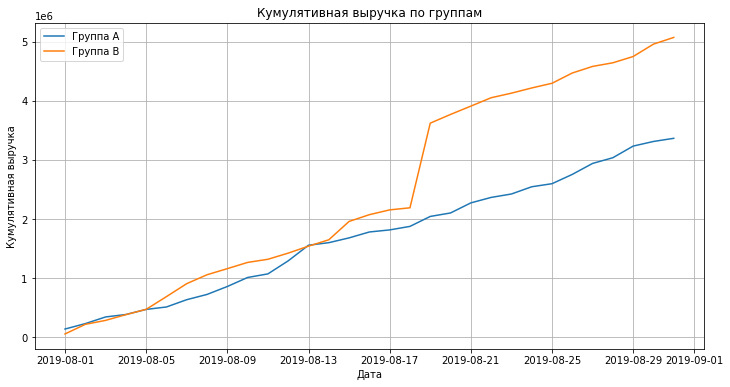

In [23]:
# Подготовим данные и построим график
# Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_data_a = cumulative_data[cumulative_data['group'] == 'A'][[
    'date', 'orders', 'buyers', 'revenue', 'visitors'
]]

# И датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B'][[
    'date', 'orders', 'buyers', 'revenue', 'visitors'
]]

plt.figure(figsize=(12, 6))

# График выручки группы А
plt.plot(cumulative_data_a['date'], cumulative_data_a['revenue'],
         label='Группа A')

# График выручки группы B
plt.plot(cumulative_data_b['date'], cumulative_data_b['revenue'],
         label='Группа B')

# Добавляем заголовок графика и подписи осей
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.legend()
plt.grid(True)

plt.show()

Группа A демонстрирует стабильный рост на протяжении всего теста без ярко выраженных точек резкого роста. Группа B наоборот: на графике заметен значительный скачок после 17 августа.

Это может говорить о наличии аномальных значений — числа заказов и/или покупке дорогих товаров. Вороятно, влияние оказывает сезонный спрос.

## График кумулятивного среднего чека по группам

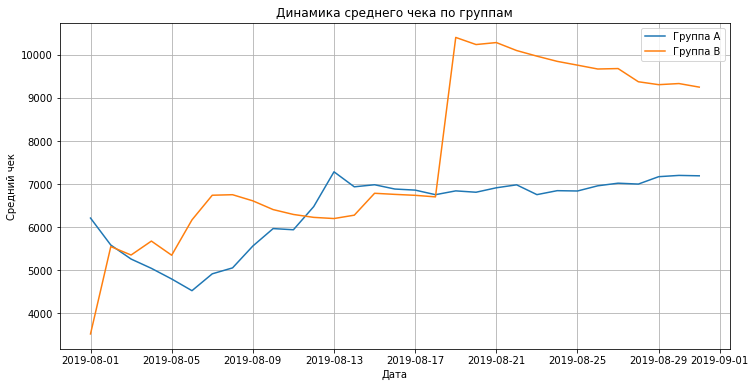

In [24]:
# Чтобы построить график среднего чека по группам, разделим кумулятивную выручку на кумулятивное число заказов

plt.figure(figsize=(12, 6))

plt.plot(
    cumulative_data_a['date'],
    cumulative_data_a['revenue'] / cumulative_data_a['orders'],
    label='Группа A'
)
plt.plot(
    cumulative_data_b['date'],
    cumulative_data_b['revenue'] / cumulative_data_b['orders'],
    label='Группа B'
)

# Добавляем заголовок и подписи осей
plt.title('Динамика среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend()
plt.grid(True)

plt.show()

Средний чек в обеих группах демонстрирует наличие резких перепадов. В группе A незначительных, а в группе B — не менее резких, чем на графике кумулятивной выручки по группам.

Возможно, на период с 17 по 21 августа действительно пришлись аномальные покупки.

## График относительного изменения кумулятивного среднего чека группы B к группе A

In [25]:
# Собираем данные
merged_cumulative_data = cumulative_data_a.merge(
    cumulative_data_b, left_on='date', right_on='date', how='left', suffixes=['_a', '_b']
)

print(merged_cumulative_data)

         date  orders_a  buyers_a  revenue_a  visitors_a  orders_b  buyers_b  \
0  2019-08-01        23        19     142779         719        17        17   
1  2019-08-02        42        36     234381        1338        40        39   
2  2019-08-03        66        60     346854        1845        54        53   
3  2019-08-04        77        71     388030        2562        68        66   
4  2019-08-05        99        92     474413        3318        89        87   
5  2019-08-06       114       104     515332        3985       112       109   
6  2019-08-07       130       120     638580        4629       135       132   
7  2019-08-08       144       133     727219        5239       157       154   
8  2019-08-09       155       143     861456        5856       176       173   
9  2019-08-10       170       158    1013731        6262       198       195   
10 2019-08-11       181       169    1074396        6980       210       207   
11 2019-08-12       200       188    129

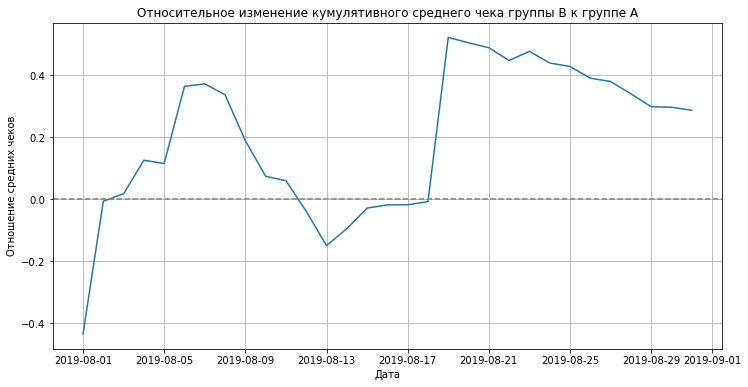

In [26]:
# Строим отношение средних чеков
plt.figure(figsize=(12, 6))

plt.plot(
    merged_cumulative_data['date'],
    (merged_cumulative_data['revenue_b'] / merged_cumulative_data['orders_b']) /
    (merged_cumulative_data['revenue_a'] / merged_cumulative_data['orders_a']) - 1
)

# Добавляем ось X
plt.axhline(y=0, color='gray', linestyle='--')
# Добавляем заголовок графика и подписи осей
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Отношение средних чеков')
plt.grid(True)

plt.show()

График подтверждает наблюдаемые ранее скачки. Предположения о выбросах подкрепляются дополнительными фактами. Кроме двух временных отрезков, группа B демонстрировала лучший средний чек.

## График кумулятивного среднего количества заказов на посетителя по группам

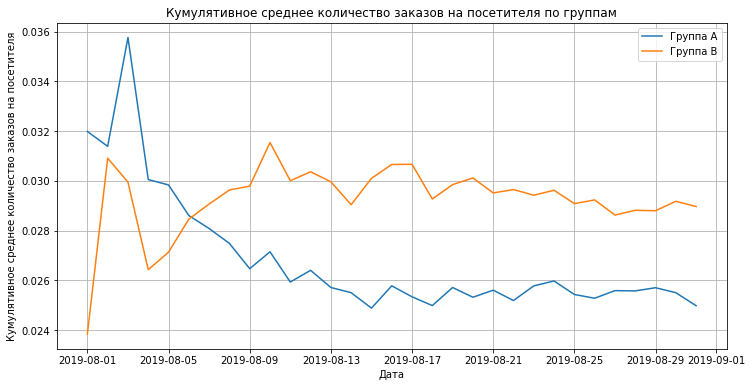

In [27]:
plt.figure(figsize=(12, 6))

plt.plot(
    merged_cumulative_data['date'],
    merged_cumulative_data['orders_a'] / merged_cumulative_data['visitors_a'],
    label='Группа A'
)
plt.plot(
    merged_cumulative_data['date'],
    merged_cumulative_data['orders_b'] / merged_cumulative_data['visitors_b'],
    label='Группа B'
)

plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее количество заказов на посетителя')
plt.legend()
plt.grid(True)

plt.show()

График кумулятивного среднего количества заказов демонстрирует у группы A лучшее положение относительно группы B в начале рассматриваемого периода, однако затем группа B демонстрирует лучшие показатели, чем группа A.

График кумулятивного среднего количества заказов демонстрирует сначала резкий рост, а затем резкое падение у обеих групп. Затем показатели группа A стабильно падают, а группы B растут. При этом они примерно пересекаются по динамике после 9 августа, однако результаты группы B выглядят лучше.

Вероятнее всего, на начало исследуемого периода пришлось аномальное количество заказов в группе A.

## График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

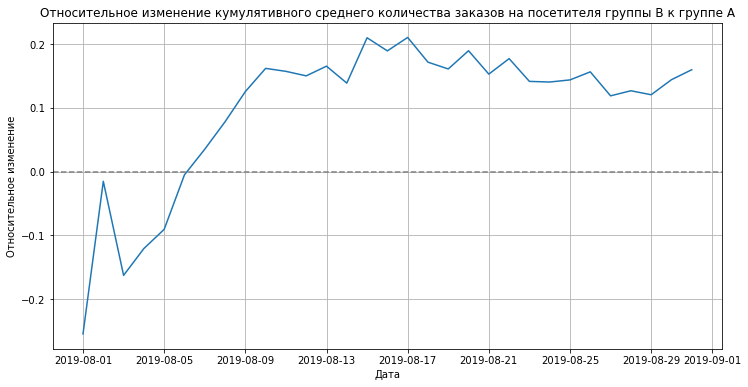

In [28]:
plt.figure(figsize=(12, 6))

plt.plot(
    merged_cumulative_data['date'],
    (merged_cumulative_data['orders_b'] / merged_cumulative_data['visitors_b']) /
    (merged_cumulative_data['orders_a'] / merged_cumulative_data['visitors_a']) - 1
)

plt.axhline(y=0, color='gray', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')

plt.grid(True)

plt.show()

Группа B показывает очевидно лучшие результаты, чем группа A. При этом в начале мы видим влияние, скорее всего, аномального количества заказов в группе A.

Значит, в группе B больше кумулятивное среднее количество заказов на посетителя. Cтабильное значение около 0.15 в конце исследования может указывать на то, что относительное различие между группами установилось на этом уровне.

## Точечный график количества заказов по пользователям

In [29]:
# Сгруппируем данные
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

orders_by_users.columns = ['visitor_id', 'orders']

print(orders_by_users.sort_values(by='orders', ascending=False).reset_index(drop=True).head(10))

   visitor_id  orders
0  3967698036       3
1   249864742       3
2  2108163459       3
3  2988190573       3
4  3908431265       3
5   611059232       3
6  2742574263       3
7   678354126       2
8  1404560065       2
9  1985475298       2


Пользователей с большим количеством заказов нету, если не считать тех, кто заказазывал 2–3 раза. Посмотрим с помощью гистограммы, насколько это нетипично для большинства посетителей.

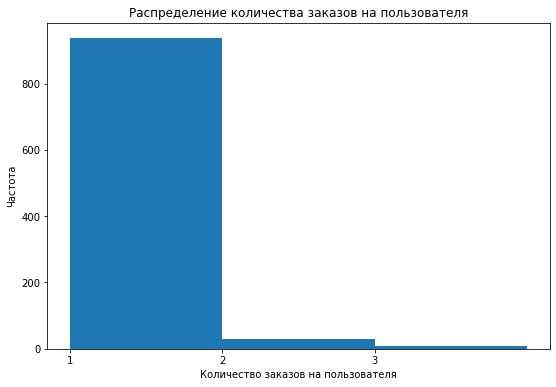

In [30]:
# Построим гистограмму распределения количества заказов на одного пользователя
plt.figure(figsize=(9, 6))
plt.hist(orders_by_users['orders'], bins=range(1, orders_by_users['orders'].max() + 2)) # Диапазон корзин гистограммы
plt.xticks(range(1, orders_by_users['orders'].max() + 1)) # Деления на оси X
plt.title('Распределение количества заказов на пользователя')
plt.xlabel('Количество заказов на пользователя')
plt.ylabel('Частота')

plt.show()

Большинство посетителей делают один заказ. Посмотрим на точечную диаграмму.

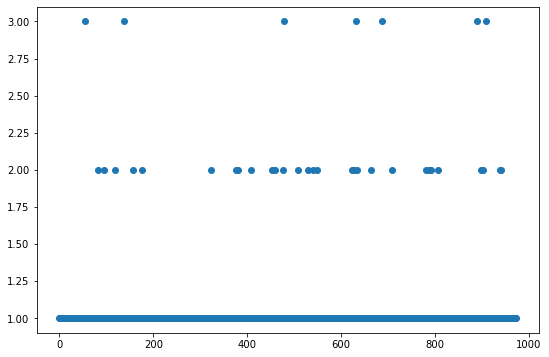

In [31]:
x_values = pd.Series(range(0, len(orders_by_users)))

plt.figure(figsize=(9, 6))
plt.scatter(x_values, orders_by_users['orders'])
plt.show()

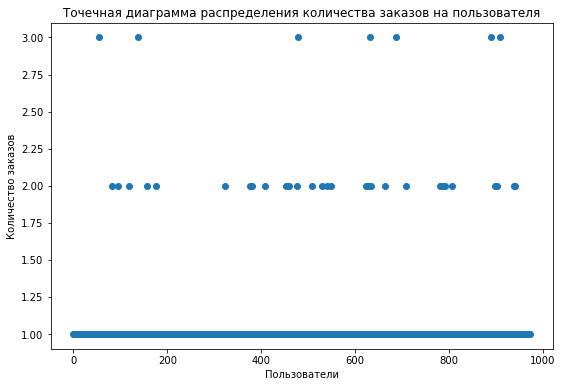

In [32]:
x_values = pd.Series(range(0, len(orders_by_users)))

plt.figure(figsize=(9, 6))
plt.scatter(x_values, orders_by_users['orders'])
plt.title('Точечная диаграмма распределения количества заказов на пользователя')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')

plt.show()

Видим достаточное количество посетители с двумя и тремя заказами. Непонятно, можно ли считать это аномалиями.

## 95-й и 99-й перцентили количества заказов на пользователя

In [33]:
print(np.percentile(orders_by_users['orders'], [95, 99]))

[1. 2.]


Исходя из полученных результатов, корректно будет отсеять посетителей с двумя и более заказами.

## Точечный график стоимостей заказов

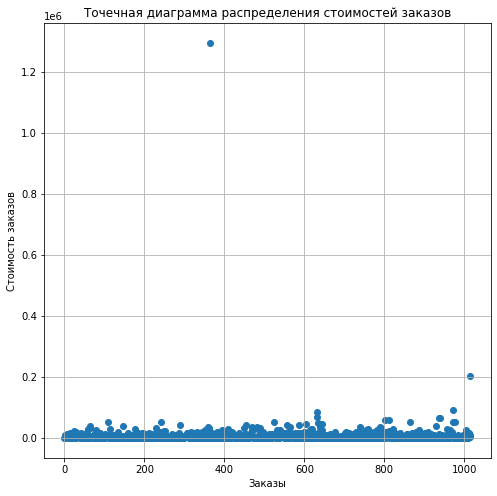

In [34]:
# Создаём Series с индексами от 0 до длины orders['revenue']
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(8, 8))
plt.scatter(x_values, orders['revenue'])
# При необходимости можем задать интервал значений по оси Y
# plt.ylim(0, 30000)
plt.grid()
plt.title('Точечная диаграмма распределения стоимостей заказов')
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказов')

plt.show()

Очевидно, что был совершён один невероятно дорогой заказ и один просто очень дорогой сильно выбиваются из общего ряда.

## 95-й и 99-й перцентили стоимости заказов

In [35]:
# Посмотрим на перцентили
print(np.percentile(orders['revenue'], [95, 99]))
print()
# На 25-й квартиль, медиану и 75-й квартиль
print(np.percentile(orders['revenue'], [25, 50, 75]))

[26785. 53904.]

[1190.   2955.   8134.25]


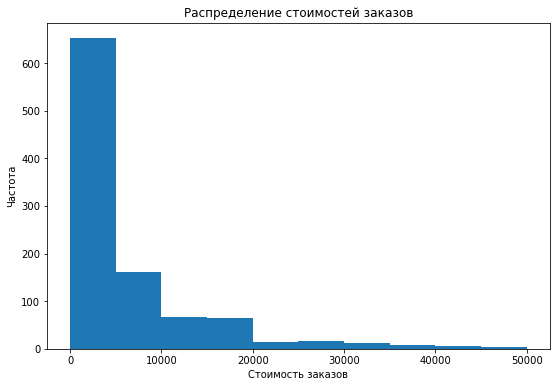

In [36]:
# Построим гистограмму
plt.figure(figsize=(9, 6))
plt.hist(orders['revenue'], range=(0, 50000))
plt.title('Распределение стоимостей заказов')
plt.xlabel('Стоимость заказов')
plt.ylabel('Частота')

plt.show()

Исходя из имеющихся данных, выбираем границу стоимости для определения аномальных заказов в 30 000 рублей — менее 5% заказов дороже. Будем считать их аномальными.

## Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

In [37]:
# Сначала подготовим данные
visitors_daily_a = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_daily_a.columns = ['date', 'visitors_per_date_a']

visitors_cummulative_a = visitors_daily_a.apply(
    lambda x: visitors_daily_a[visitors_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_a.columns = ['date', 'visitors_cummulative_a']

visitors_daily_b = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_daily_b.columns = ['date', 'visitors_per_date_b']

visitors_cummulative_b = visitors_daily_b.apply(
    lambda x: visitors_daily_b[visitors_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_b.columns = ['date', 'visitors_cummulative_b']

orders_daily_a = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_a.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

orders_cummulative_a = orders_daily_a.apply(
    lambda x: orders_daily_a[orders_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_cummulative_a.columns = [
    'date',
    'orders_cummulative_a',
    'revenue_cummulative_a',
]

orders_daily_b = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_b.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

orders_cummulative_b = orders_daily_b.apply(
    lambda x: orders_daily_b[orders_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_cummulative_b.columns = [
    'date',
    'orders_cummulative_b',
    'revenue_cummulative_b',
]

data = (
    orders_daily_a.merge(
        orders_daily_b, left_on='date', right_on='date', how='left'
    )
    .merge(orders_cummulative_a, left_on='date', right_on='date', how='left')
    .merge(orders_cummulative_b, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_a, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_b, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_a, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_b, left_on='date', right_on='date', how='left')
)

print(data.head())

        date  orders_per_date_a  revenue_per_date_a  orders_per_date_b  \
0 2019-08-01                 23              142779                 17   
1 2019-08-02                 19               91602                 23   
2 2019-08-03                 24              112473                 14   
3 2019-08-04                 11               41176                 14   
4 2019-08-05                 22               86383                 21   

   revenue_per_date_b  orders_cummulative_a  revenue_cummulative_a  \
0               59758                    23                 142779   
1              162043                    42                 234381   
2               67049                    66                 346854   
3               96890                    77                 388030   
4               89908                    99                 474413   

   orders_cummulative_b  revenue_cummulative_b  visitors_per_date_a  \
0                    17                  59758                 

Сформулируем гипотезы.

Нулевая: различий в среднем количестве заказов между группами нет.

Альтернативная: различия в среднем между группами есть.

In [38]:
# Сформируем данные, в которых пользователям из разных групп будет соответствовать количество заказов
# Тем, кто ничего не заказал, будут соответствовать нули
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders']

sample_a = pd.concat(
    [
        orders_by_users_a['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b = pd.concat(
    [
        orders_by_users_b['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value: {0:.3f}'.format(stats.mannwhitneyu(sample_a, sample_b)[1]))
print()
print('Относительный прирост среднего количества заказов на посетителя между группой B и A по «сырым» данным: {0:.3f}'.format(sample_b.mean() / sample_a.mean() - 1))

p-value: 0.011

Относительный прирост среднего количества заказов на посетителя между группой B и A по «сырым» данным: 0.160


По «сырым» данным наблюдаются отличия в среднем количестве заказов между группами.

Значение p-value составляет 0.011, что меньше уровня значимости 0.05. Это указывает на наличие статистически значимых различий в среднем количестве заказов между группами B и A.

Относительное увеличение среднего количества заказов на посетителя в группе B по сравнению с группой A по «сырым» данным составляет 16%.

## Статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Нулевая гипотеза: различий в среднем количестве заказов между группами нет.

Альтернативная гипотеза: различия в среднем между группами есть.

In [39]:
print('p-value: {0:.3f}'.format(
    stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1]
))

print('Относительный прирост среднего чека заказа между группой B и A по «сырым» данным: {0:.3f}'.format(
    orders[orders['group'] == 'B']['revenue'].mean() / orders[orders['group'] == 'A']['revenue'].mean() - 1
))

p-value: 0.829
Относительный прирост среднего чека заказа между группой B и A по «сырым» данным: 0.287


P-value равно 0.829, что превышает уровень значимости 0.05. Это говорит о том, что у нас нет статистически значимых оснований для отвержения нулевой гипотезы об отсутствии различий между средними значениями средних чеков групп B и A.

Относительное увеличение среднего чека заказа между группой B и A по «сырым» данным равно 28.7%. Однако на данном этапе нельзя делать вывод о том, что средний чек группы B лучше среднего чека группы A со статистической достоверностью.

## Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Примем за аномальных посетителей тех, кто совершил от 2 заказов и больше и/или совершил заказ дороже 30 000 рублей. Так мы уберём порядка 5% посетителей с наибольшим числом заказов и около 5% посетителей с дорогими заказами.

In [40]:
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] >= 2]['visitor_id'],
        orders_by_users_b[orders_by_users_b['orders'] >= 2]['visitor_id'],
    ],
    axis=0,
)
users_with_expensive_orders = orders[orders['revenue'] > 30000]['visitor_id']

abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormal_users.head(5))
print()
print(abnormal_users.shape[0])

937    148427295
792    204675465
33     249864742
586    358944393
36     366673373
Name: visitor_id, dtype: int64

77


77 аномальных посетителей. Узнаем, как их действия повлияли на результаты.

Повторим раннее сформулированные гипотезы.

Нулевая гипотеза: различий в среднем количестве заказов между группами нет.

Альтернативная гипотеза: различия в среднем количестве заказов между группами есть.

In [41]:
# Подготовим выборки количества заказов по пользователям по группам
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value: {0:.3f}'.format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
print()
print('Относительный прирост среднего количества заказов на посетителя между группой B и A по «очищенным» данным: {0:.3f}'.format(sample_b_filtered.mean() / sample_a_filtered.mean() -1))

p-value: 0.013

Относительный прирост среднего количества заказов на посетителя между группой B и A по «очищенным» данным: 0.180


P-value равно 0.013, что меньше уровня значимости 0.05. Это говорит о том, что у нас есть статистически значимые основания для отвержения нулевой гипотезы о том, что различий в среднем количестве заказов между группами нет. Таким образом, результаты позволяют нам сделать вывод о наличии статистически значимых различий в среднем количестве заказов между группами.

Относительный прирост среднего количества заказов на посетителя между группой B и A по «очищенным» данным равен 0.180. Это означает, что по «очищенным» данным среднее количество заказов на посетителя в группе B выше на 18% по сравнению с группой A.

Такие выводы говорят о том, что есть статистически значимые различия между группами и относительный прирост среднего количества заказов в группе B по сравнению с группой A достаточно высок.

Таким образом, нулевую гипотезу следует отвергнуть в пользу альтернативной.

## Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Повторим гипотезы.

Нулевая гипотеза: различий в среднем количестве заказов между группами нет.

Альтернативная гипотеза: различия в среднем между группами есть.

In [42]:
print(
    'p-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)
print()
print(
    'Относительный прирост среднего чека заказа между группой B и A по «очищенным» данным: {0:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.829

Относительный прирост среднего чека заказа между группой B и A по «очищенным» данным: -0.011


После фильтрации аномальных значений, ситуация изменилась. P-value стало немного выше, и в данной ситуации группа A опередила группу B. Тем не менее, разница между средними чеками заказов составляет всего 1%, что является незначительным.

Изначально относительный прирост среднего чека заказа между группой B и A по «сырым» данным составлял 28.7%, однако на данном этапе невозможно было делать вывод о том, что средний чек группы B с высокой степенью статистической достоверности отличается от среднего чека группы A.

Однако, после применения фильтрации и анализа «очищенных» данных, относительный прирост среднего чека заказа между группой B и A составил -0.011 (1%), а P-value осталось на уровне 0.829. Это говорит о том, что изменение среднего чека в группах не является статистически значимым, и различия, которые мы наблюдали по «сырым» данным, могут быть обусловлены аномалиями.

# 3. Вывод

С учётом результатов анализа «сырых» и «очищенных» данных, а также уровней значимости P-value, мы пришли к выводу, во-первых, о наличии статистически значимых различий в среднем количестве заказов между группами B и A и, во-вторых, об отсутствии различия средних чеков заказов между группами не обладают статистической значимостью.

Поэтому рекомендуется остановить тест и зафиксировать победу группы B.

Статистически значимые различия в среднем количестве заказов между группами присутствуют как по «сырым» данным (P-value = 0.011), так и по «очищенным» данным (P-value = 0.013). Кроме того, относительный прирост среднего количества заказов на посетителя между группами по «очищенным» данным составляет 18%.

Учитывая эти результаты, имеется достаточно оснований для принятия решения о завершении теста и зафиксировании победы группы B по одной метрике Среднее количество заказов и ничьей по метрике Средний чек.